In [10]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [11]:
compas = pd.read_csv('C:/Users/sjaco/OneDrive/Desktop/final project/compas.csv')

In [12]:
compas.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [13]:
print(compas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15648 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

In [14]:
cat_compas = compas.select_dtypes(include=['object']).copy()

In [15]:
cat_compas.head()

,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType
0,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Violence,Low,New
1,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Recidivism,Low,New
2,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Failure to Appear,Low,New
3,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Violence,Low,New
4,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Recidivism,Low,New


In [16]:
print(cat_compas.isnull().values.sum())

45240


In [17]:
print(cat_compas.isnull().sum())

Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45195
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevelText        0
DisplayText                    0
ScoreText                     45
AssessmentType                 0
dtype: int64


In [18]:
#MiddleName is the most incomplete and has enough NULL values that I think it's better just to drop it completely

In [19]:
del cat_compas['MiddleName']

In [20]:
cat_compas.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType
0,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Violence,Low,New
1,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Recidivism,Low,New
2,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Failure to Appear,Low,New
3,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Violence,Low,New
4,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Recidivism,Low,New


In [21]:
cat_compas = cat_compas.fillna(cat_compas['ScoreText'].value_counts().index[0])

In [22]:
print(cat_compas.isnull().values.sum())

0


In [23]:
#no NULL values left so now we can move on 

In [24]:
print(cat_compas['Ethnic_Code_Text'].value_counts())

African-American    27018
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
African-Am             51
Oriental               39
Name: Ethnic_Code_Text, dtype: int64


In [25]:
#combine "African-American" and "African-Am", also "Asian" and "Oriental" -problematic yeesh

In [26]:
def race (series): 
    if series == "African-American":
        return 0
    if series == "Caucasian": 
        return 1
    if series == "Hispanic":
        return 2
    if series == "Other":
        return 3
    if series == "Asian":
        return 4
    if series == "Native American":
        return 5
    if series == "Arabic":
        return 6
    if series == "African-Am":
        return 0
    if series == "Oriental":
        return 4
    
cat_compas['Ethnic_Code_TextR'] = cat_compas['Ethnic_Code_Text'].apply(race)

In [27]:
print(cat_compas['Ethnic_Code_TextR'].value_counts())

0    27069
1    21783
2     8742
3     2592
4      363
5      219
6       75
Name: Ethnic_Code_TextR, dtype: int64


In [28]:
cat_compas.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR
0,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Violence,Low,New,1
1,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Recidivism,Low,New,1
2,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Failure to Appear,Low,New,1
3,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Violence,Low,New,1
4,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Recidivism,Low,New,1


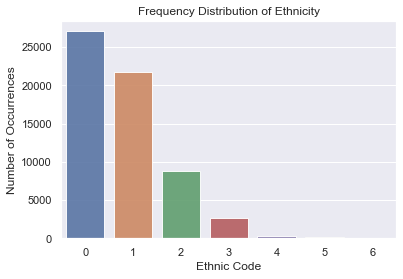

In [29]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
ethnicity_count = cat_compas['Ethnic_Code_TextR'].value_counts()
sns.set(style="darkgrid")
sns.barplot(ethnicity_count.index, ethnicity_count.values, alpha=0.9)
plt.title('Frequency Distribution of Ethnicity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ethnic Code', fontsize=12)
plt.show()

In [30]:
#If nothing else we can see that African Americans are arrested far more frequently than the other races classified in this dataset.

In [31]:
#recode the rest of the columns

In [32]:
print(cat_compas['Language'].value_counts())

English    60591
Spanish      252
Name: Language, dtype: int64


In [33]:
def language (series): 
    if series == "English":
        return 0
    if series == "Spanish": 
        return 1
cat_compas['LanguageR'] = cat_compas['Language'].apply(language)

In [34]:
print(cat_compas['LegalStatus'].value_counts())

Pretrial               37578
Post Sentence          18333
Other                   4356
Conditional Release      420
Probation Violator       126
Parole Violator           18
Deferred Sentencing       12
Name: LegalStatus, dtype: int64


In [35]:
def status (series): 
    if series == "Pretrial":
        return 0
    if series == "Post Sentence": 
        return 1
    if series == "Other":
        return 2
    if series == "Conditional Release":
        return 3
    if series == "Probation Violator":
        return 4
    if series == "Parole Violator":
        return 5
    if series == "Deferred Sentencing":
        return 6
cat_compas['LegalStatusR'] = cat_compas['LegalStatus'].apply(status)

In [36]:
print(cat_compas['CustodyStatus'].value_counts())

Jail Inmate            30129
Probation              22968
Pretrial Defendant      7644
Residential Program       66
Parole                    21
Prison Inmate             15
Name: CustodyStatus, dtype: int64


In [37]:
def cust (series): 
    if series == "Jail Inmate":
        return 0
    if series == "Probation": 
        return 1
    if series == "Pretrial Defendant":
        return 2
    if series == "Residential Program":
        return 3
    if series == "Parole":
        return 4
    if series == "Prison Inmate":
        return 5
cat_compas['CustodyStatusR'] = cat_compas['CustodyStatus'].apply(cust)

In [38]:
print(cat_compas['MaritalStatus'].value_counts())

Single               45126
Married               8172
Divorced              3879
Separated             1803
Significant Other     1260
Widowed                390
Unknown                213
Name: MaritalStatus, dtype: int64


In [39]:
def love (series): 
    if series == "Single":
        return 0
    if series == "Married": 
        return 1
    if series == "Divorced":
        return 2
    if series == "Separated":
        return 3
    if series == "Significant Other":
        return 4
    if series == "Widowed":
        return 5
    if series == "Unknown":
        return 6
cat_compas['MaritalStatusR'] = cat_compas['MaritalStatus'].apply(love)

In [40]:
print(cat_compas['RecSupervisionLevelText'].value_counts())

Low                                   38472
Medium                                10476
Medium with Override Consideration     7827
High                                   4068
Name: RecSupervisionLevelText, dtype: int64


In [41]:
print(cat_compas.dtypes)

Agency_Text                object
LastName                   object
FirstName                  object
Sex_Code_Text              object
Ethnic_Code_Text           object
DateOfBirth                object
ScaleSet                   object
AssessmentReason           object
Language                   object
LegalStatus                object
CustodyStatus              object
MaritalStatus              object
Screening_Date             object
RecSupervisionLevelText    object
DisplayText                object
ScoreText                  object
AssessmentType             object
Ethnic_Code_TextR           int64
LanguageR                   int64
LegalStatusR                int64
CustodyStatusR              int64
MaritalStatusR              int64
dtype: object


In [42]:
cat_compas['Agency_Text'] = cat_compas['Agency_Text'].astype('category')
cat_compas['LastName'] = cat_compas['LastName'].astype('category') 
cat_compas['FirstName'] = cat_compas['FirstName'].astype('category') 
cat_compas['Sex_Code_Text'] = cat_compas['Sex_Code_Text'].astype('category') 
cat_compas['Ethnic_Code_Text'] = cat_compas['Ethnic_Code_Text'].astype('category')
cat_compas['DateOfBirth'] = cat_compas['DateOfBirth'].astype('category') 
cat_compas['ScaleSet'] = cat_compas['ScaleSet'].astype('category') 
cat_compas['AssessmentReason'] = cat_compas['AssessmentReason'].astype('category') 
cat_compas['Language'] = cat_compas['Language'].astype('category')
cat_compas['LegalStatus'] = cat_compas['LegalStatus'].astype('category') 
cat_compas['CustodyStatus'] = cat_compas['CustodyStatus'].astype('category') 
cat_compas['MaritalStatus'] = cat_compas['MaritalStatus'].astype('category') 
cat_compas['Screening_Date'] = cat_compas['Screening_Date'].astype('category')
cat_compas['RecSupervisionLevelText'] = cat_compas['RecSupervisionLevelText'].astype('category') 
cat_compas['DisplayText'] = cat_compas['DisplayText'].astype('category') 
cat_compas['ScoreText'] = cat_compas['ScoreText'].astype('category') 
cat_compas['AssessmentType'] = cat_compas['AssessmentType'].astype('category') 

print(cat_compas.dtypes)

Agency_Text                category
LastName                   category
FirstName                  category
Sex_Code_Text              category
Ethnic_Code_Text           category
DateOfBirth                category
ScaleSet                   category
AssessmentReason           category
Language                   category
LegalStatus                category
CustodyStatus              category
MaritalStatus              category
Screening_Date             category
RecSupervisionLevelText    category
DisplayText                category
ScoreText                  category
AssessmentType             category
Ethnic_Code_TextR             int64
LanguageR                     int64
LegalStatusR                  int64
CustodyStatusR                int64
MaritalStatusR                int64
dtype: object


In [167]:
cat_compas['RecSupervisionLevelText'] = cat_compas['RecSupervisionLevelText'].cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [44]:
cat_compas.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,...,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Violence,Low,New,1,0,0,0,0
1,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Recidivism,Low,New,1,0,0,0,0
2,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Failure to Appear,Low,New,1,0,0,0,0
3,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Violence,Low,New,1,0,0,0,1
4,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Recidivism,Low,New,1,0,0,0,1


In [45]:
cat_compas_sklearn = cat_compas.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_compas_sklearn['ScoreText'] = lb_make.fit_transform(cat_compas['ScoreText'])

cat_compas_sklearn.head() #Results in appending a new column to df

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,...,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Violence,1,New,1,0,0,0,0
1,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Recidivism,1,New,1,0,0,0,0
2,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Failure to Appear,1,New,1,0,0,0,0
3,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Violence,1,New,1,0,0,0,1
4,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Risk of Recidivism,1,New,1,0,0,0,1


In [46]:
#quick encoding for the remaining categories

In [47]:
cat_compas_sklearn['AssessmentType'] = lb_make.fit_transform(cat_compas['AssessmentType'])
cat_compas_sklearn['DisplayText'] = lb_make.fit_transform(cat_compas['DisplayText'])
cat_compas_sklearn['Screening_Date'] = lb_make.fit_transform(cat_compas['Screening_Date'])
cat_compas_sklearn['AssessmentReason'] = lb_make.fit_transform(cat_compas['AssessmentReason'])
cat_compas_sklearn['ScaleSet'] = lb_make.fit_transform(cat_compas['ScaleSet'])
cat_compas_sklearn['LastName'] = lb_make.fit_transform(cat_compas['LastName'])
cat_compas_sklearn['FirstName'] = lb_make.fit_transform(cat_compas['FirstName'])

In [48]:
cat_compas_sklearn.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,...,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,PRETRIAL,3005,3197,Male,Caucasian,12/5/1992,1,0,English,Pretrial,...,0,1,2,1,1,1,0,0,0,0
1,PRETRIAL,3005,3197,Male,Caucasian,12/5/1992,1,0,English,Pretrial,...,0,1,1,1,1,1,0,0,0,0
2,PRETRIAL,3005,3197,Male,Caucasian,12/5/1992,1,0,English,Pretrial,...,0,1,0,1,1,1,0,0,0,0
3,PRETRIAL,4426,3017,Male,Caucasian,9/16/1984,1,0,English,Pretrial,...,0,1,2,1,1,1,0,0,0,1
4,PRETRIAL,4426,3017,Male,Caucasian,9/16/1984,1,0,English,Pretrial,...,0,1,1,1,1,1,0,0,0,1


In [49]:
cat_compas_sklearn["DateOfBirth"] = pd.to_datetime(cat_compas_sklearn['DateOfBirth'])

In [50]:
cat_compas_sklearn.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,...,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,PRETRIAL,3005,3197,Male,Caucasian,1992-12-05,1,0,English,Pretrial,...,0,1,2,1,1,1,0,0,0,0
1,PRETRIAL,3005,3197,Male,Caucasian,1992-12-05,1,0,English,Pretrial,...,0,1,1,1,1,1,0,0,0,0
2,PRETRIAL,3005,3197,Male,Caucasian,1992-12-05,1,0,English,Pretrial,...,0,1,0,1,1,1,0,0,0,0
3,PRETRIAL,4426,3017,Male,Caucasian,1984-09-16,1,0,English,Pretrial,...,0,1,2,1,1,1,0,0,0,1
4,PRETRIAL,4426,3017,Male,Caucasian,1984-09-16,1,0,English,Pretrial,...,0,1,1,1,1,1,0,0,0,1


In [51]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from datetime import datetime
from datetime import date

In [52]:
cat_compas_sklearn.shape

(60843, 22)

In [53]:
compas.shape

(60843, 28)

In [54]:
del cat_compas_sklearn['LegalStatus']
del cat_compas_sklearn['Language']
del cat_compas_sklearn['Ethnic_Code_Text']
del cat_compas_sklearn['Sex_Code_Text']
del cat_compas_sklearn['Agency_Text']

In [55]:
cat_compas_sklearn.head()

,LastName,FirstName,DateOfBirth,ScaleSet,AssessmentReason,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,3005,3197,1992-12-05,1,0,Jail Inmate,Single,0,1,2,1,1,1,0,0,0,0
1,3005,3197,1992-12-05,1,0,Jail Inmate,Single,0,1,1,1,1,1,0,0,0,0
2,3005,3197,1992-12-05,1,0,Jail Inmate,Single,0,1,0,1,1,1,0,0,0,0
3,4426,3017,1984-09-16,1,0,Jail Inmate,Married,0,1,2,1,1,1,0,0,0,1
4,4426,3017,1984-09-16,1,0,Jail Inmate,Married,0,1,1,1,1,1,0,0,0,1


In [56]:
del cat_compas_sklearn['CustodyStatus']
del cat_compas_sklearn['MaritalStatus']

In [57]:
cat_compas_sklearn.head()

,LastName,FirstName,DateOfBirth,ScaleSet,AssessmentReason,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,3005,3197,1992-12-05,1,0,0,1,2,1,1,1,0,0,0,0
1,3005,3197,1992-12-05,1,0,0,1,1,1,1,1,0,0,0,0
2,3005,3197,1992-12-05,1,0,0,1,0,1,1,1,0,0,0,0
3,4426,3017,1984-09-16,1,0,0,1,2,1,1,1,0,0,0,1
4,4426,3017,1984-09-16,1,0,0,1,1,1,1,1,0,0,0,1


In [58]:
cat_compas_sklearn.shape

(60843, 15)

Merge compas dataset with cat_compas_sklearn

In [59]:
compas_concat = pd.concat([compas, cat_compas_sklearn], axis=1)

In [60]:
compas_concat.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,0,1,2,1,1,1,0,0,0,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,0,1,1,1,1,1,0,0,0,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,0,1,0,1,1,1,0,0,0,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,...,0,1,2,1,1,1,0,0,0,1
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,...,0,1,1,1,1,1,0,0,0,1


In [61]:
print(compas_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person_ID                60843 non-null  int64   
 1   AssessmentID             60843 non-null  int64   
 2   Case_ID                  60843 non-null  int64   
 3   Agency_Text              60843 non-null  object  
 4   LastName                 60843 non-null  object  
 5   FirstName                60843 non-null  object  
 6   MiddleName               15648 non-null  object  
 7   Sex_Code_Text            60843 non-null  object  
 8   Ethnic_Code_Text         60843 non-null  object  
 9   DateOfBirth              60843 non-null  object  
 10  ScaleSet_ID              60843 non-null  int64   
 11  ScaleSet                 60843 non-null  object  
 12  AssessmentReason         60843 non-null  object  
 13  Language                 60843 non-null  object  
 14  LegalS

get rid of duplicate columns

In [62]:
del compas_concat['LastName']
del compas_concat['FirstName']
del compas_concat['Language']
del compas_concat['Ethnic_Code_Text']
del compas_concat['Sex_Code_Text']
del compas_concat['Agency_Text']
del compas_concat['ScaleSet']
del compas_concat['AssessmentReason']
del compas_concat['CustodyStatus']
del compas_concat['MaritalStatus']
del compas_concat['Screening_Date']
del compas_concat['RecSupervisionLevelText']
del compas_concat['DisplayText']
del compas_concat['ScoreText']
del compas_concat['AssessmentType']
del compas_concat['LegalStatus']

In [63]:
print(compas_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Person_ID            60843 non-null  int64   
 1   AssessmentID         60843 non-null  int64   
 2   Case_ID              60843 non-null  int64   
 3   MiddleName           15648 non-null  object  
 4   DateOfBirth          60843 non-null  object  
 5   ScaleSet_ID          60843 non-null  int64   
 6   RecSupervisionLevel  60843 non-null  int64   
 7   Scale_ID             60843 non-null  int64   
 8   RawScore             60843 non-null  float64 
 9   DecileScore          60843 non-null  int64   
 10  IsCompleted          60843 non-null  int64   
 11  IsDeleted            60843 non-null  int64   
 12  DateOfBirth          60843 non-null  category
 13  Ethnic_Code_TextR    60843 non-null  int64   
 14  LanguageR            60843 non-null  int64   
 15  LegalStatusR       

In [64]:
compas_concat = compas_concat.loc[:,~compas_concat.columns.duplicated()]

In [65]:
compas_concat["DateOfBirth"] = pd.to_datetime(compas_concat['DateOfBirth'])

In [66]:
print(compas_concat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Person_ID            60843 non-null  int64         
 1   AssessmentID         60843 non-null  int64         
 2   Case_ID              60843 non-null  int64         
 3   MiddleName           15648 non-null  object        
 4   DateOfBirth          60843 non-null  datetime64[ns]
 5   ScaleSet_ID          60843 non-null  int64         
 6   RecSupervisionLevel  60843 non-null  int64         
 7   Scale_ID             60843 non-null  int64         
 8   RawScore             60843 non-null  float64       
 9   DecileScore          60843 non-null  int64         
 10  IsCompleted          60843 non-null  int64         
 11  IsDeleted            60843 non-null  int64         
 12  Ethnic_Code_TextR    60843 non-null  int64         
 13  LanguageR            60843 non-

In [123]:
compas_concat['DateOfBirth'] = pd.to_datetime(compas_concat['DateOfBirth']).astype(np.int64)

## ALL DATA CONVERSIONS NEED TO BE DONE PRIOR TO THIS POINT

In [124]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

x=compas_concat[['Person_ID', 'AssessmentID', 'Case_ID', 'DateOfBirth', 'ScaleSet_ID', 'RecSupervisionLevel', 'Scale_ID', 'RawScore', 'IsCompleted', 'IsDeleted', 'Ethnic_Code_TextR', 'LanguageR', 'LegalStatusR', 'CustodyStatusR', 'MaritalStatusR']]  # Features
y=compas_concat['DecileScore']  # Labels

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
# 70% training and 30% test

In [125]:
print(x_train.shape, x_test.shape)

(42590, 15) (18253, 15)


In [126]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [127]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

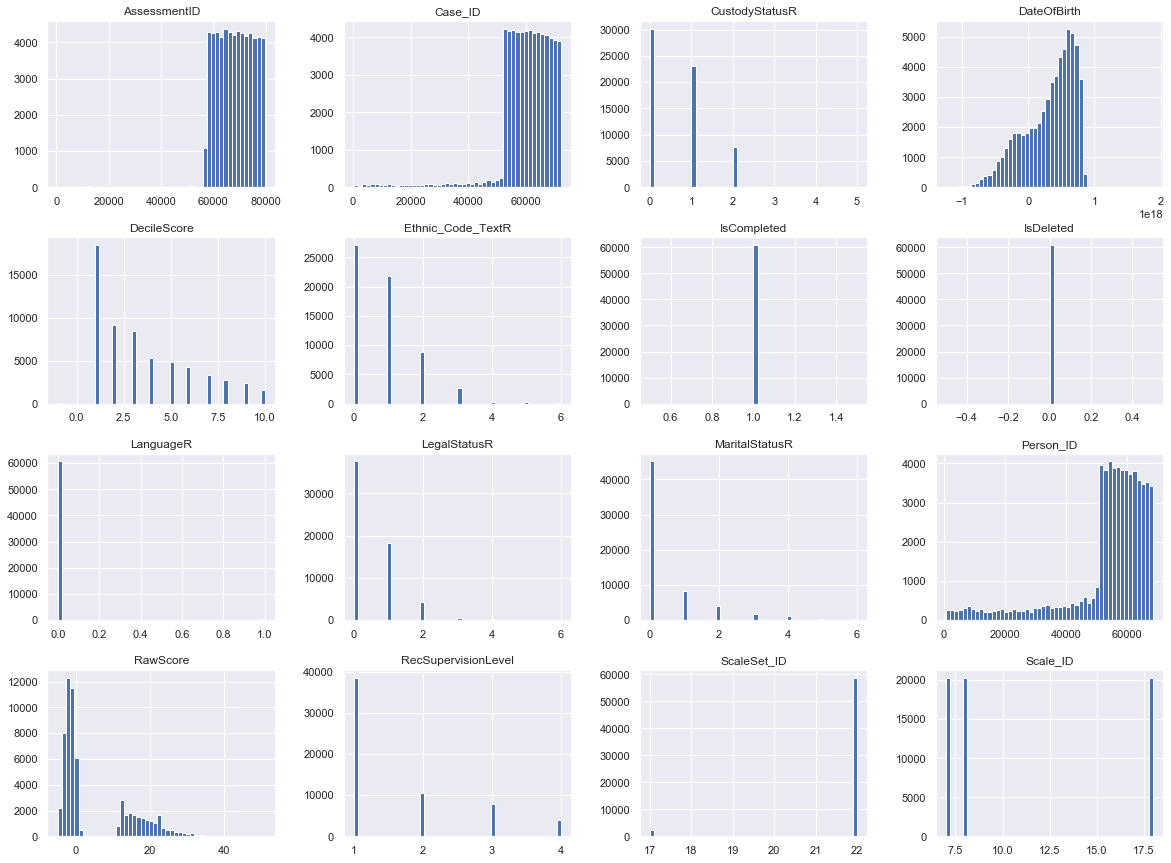

In [128]:
%matplotlib inline
# only in a Jupyter notebook
compas_concat.hist(bins=50, figsize=(20,15))
plt.show()

In [129]:
corr_matrix = compas_concat.corr()

In [130]:
corr_matrix["Ethnic_Code_TextR"].sort_values(ascending=False)

Ethnic_Code_TextR      1.000000
LegalStatusR           0.132454
Person_ID              0.124325
MaritalStatusR         0.115191
Case_ID                0.084052
LanguageR              0.081438
CustodyStatusR         0.069956
ScaleSet_ID            0.047067
AssessmentID           0.041093
Scale_ID               0.000000
RawScore              -0.039254
DateOfBirth           -0.112459
DecileScore           -0.217456
RecSupervisionLevel   -0.246244
IsCompleted                 NaN
IsDeleted                   NaN
Name: Ethnic_Code_TextR, dtype: float64

In [131]:
#It looks like "marital status" may a value worth looking at more closely 

In [132]:
def split_train_test(data, test_ratio):    
    shuffled_indices = np.random.permutation(len(data))    
    test_set_size = int(len(data) * test_ratio)    
    test_indices = shuffled_indices[:test_set_size]    
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [133]:
train_set, test_set = split_train_test(compas_concat, 0.2)

In [134]:
print(len(train_set), "train +", len(test_set), "test")

48675 train + 12168 test


In [135]:
from pandas.plotting import scatter_matrix

## Use bar charts instead

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6465EDD08>,
      dtype=object)

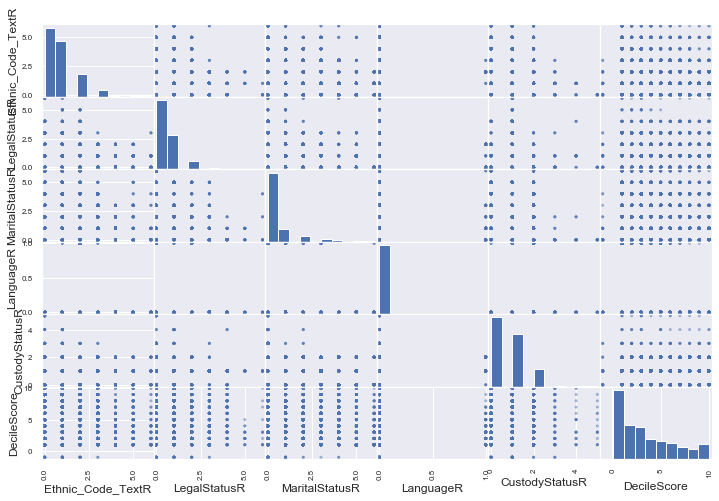

In [136]:
attributes = ["Ethnic_Code_TextR", "LegalStatusR", "MaritalStatusR", 
              "LanguageR", "CustodyStatusR", "DecileScore"]
scatter_matrix(compas_concat[attributes], figsize=(12,8))

In [137]:
corr_matrix["Ethnic_Code_TextR"].sort_values(ascending=False)

Ethnic_Code_TextR      1.000000
LegalStatusR           0.132454
Person_ID              0.124325
MaritalStatusR         0.115191
Case_ID                0.084052
LanguageR              0.081438
CustodyStatusR         0.069956
ScaleSet_ID            0.047067
AssessmentID           0.041093
Scale_ID               0.000000
RawScore              -0.039254
DateOfBirth           -0.112459
DecileScore           -0.217456
RecSupervisionLevel   -0.246244
IsCompleted                 NaN
IsDeleted                   NaN
Name: Ethnic_Code_TextR, dtype: float64

In [138]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  

In [139]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [141]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_train.shape)

(36505, 15) (36505,)
(24338, 15) (36505,)


In [142]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [144]:
import os

import shap
import gc

from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
warnings.simplefilter(action='ignore', category=FutureWarning)

In [145]:
## ----------Dataset for  LightGBM Model  -----------------------
train_data=lgb.Dataset(x_train,label=y_train)
valid_data=lgb.Dataset(x_test,label=y_test)

Verify dataset is what we should be using

In [146]:
print(compas_concat.dtypes)

Person_ID                int64
AssessmentID             int64
Case_ID                  int64
MiddleName              object
DateOfBirth              int64
ScaleSet_ID              int64
RecSupervisionLevel      int64
Scale_ID                 int64
RawScore               float64
DecileScore              int64
IsCompleted              int64
IsDeleted                int64
Ethnic_Code_TextR        int64
LanguageR                int64
LegalStatusR             int64
CustodyStatusR           int64
MaritalStatusR           int64
dtype: object


In [120]:
print(compas_concat.dtypes)

Person_ID                int64
AssessmentID             int64
Case_ID                  int64
MiddleName              object
DateOfBirth              int64
ScaleSet_ID              int64
RecSupervisionLevel      int64
Scale_ID                 int64
RawScore               float64
DecileScore              int64
IsCompleted              int64
IsDeleted                int64
Ethnic_Code_TextR        int64
LanguageR                int64
LegalStatusR             int64
CustodyStatusR           int64
MaritalStatusR           int64
dtype: object


In [147]:
lgbm = lgb.train(params,
                 train_data,
#                  2500,
                 valid_sets=valid_data,
                 early_stopping_rounds= 15,
                 verbose_eval= 30
                 )

Training until validation scores don't improve for 15 rounds
[30]	valid_0's auc: 0.596106
[60]	valid_0's auc: 0.652361
[90]	valid_0's auc: 0.668344
Early stopping, best iteration is:
[80]	valid_0's auc: 0.668388


In [165]:
##this is telling me the accuracy of my training data

In [166]:
from sklearn.metrics import roc_auc_score
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]
    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]
    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc
  return roc_auc_dict

########This is code to address a Multi_Class error I got in the following cell

In [154]:
y_pred = lgbm.predict(x_test)
score = roc_auc_score_multiclass(y_test, y_pred)
#print("Overall AUC on validation (not test!): {:.3f}" .format(score))
print(score)

{1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 0.5, 9: 0.5, 10: 0.5, -1: 0.5}


In [160]:
data = compas_concat.drop(['DecileScore', 'MiddleName'],axis=1)

In [161]:
import shap
lgbm.params['objective'] = 'binary' ## workaround
%time shap_values = shap.TreeExplainer(lgbm).shap_values(data)

Wall time: 7.13 s


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [168]:
lm = LinearRegression()

In [169]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

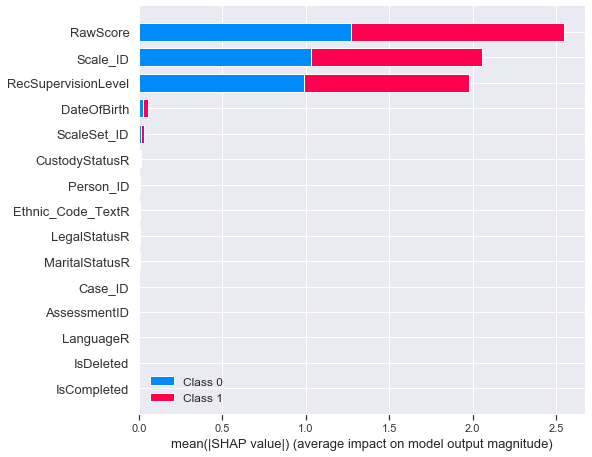

In [170]:
shap.summary_plot(shap_values, data)


In [172]:
%time shap_values = shap.TreeExplainer(lgbm).shap_values(x_test)

Wall time: 2.57 s


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


AttributeError: module 'pandas' has no attribute 'compas_concat'